In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('SpotifyFeatures.csv')

In [26]:
df.shape

(232725, 18)

In [27]:
column = 'track_id'
duplicates = df[df.duplicated(subset=[column], keep=False)]
df.drop_duplicates(subset=[column], keep=False, inplace=True)

In [28]:
df.shape

(141650, 18)

In [29]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [30]:
columns_to_drop = ['artist_name', 'track_name', 'track_id', 'popularity', 'duration_ms', 'key', 'mode', 'time_signature']
df = df.drop(columns=columns_to_drop)
df.head()


,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Movie,0.611,0.389,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,Movie,0.246,0.590,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,Movie,0.952,0.663,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,Movie,0.703,0.240,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,Movie,0.950,0.331,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


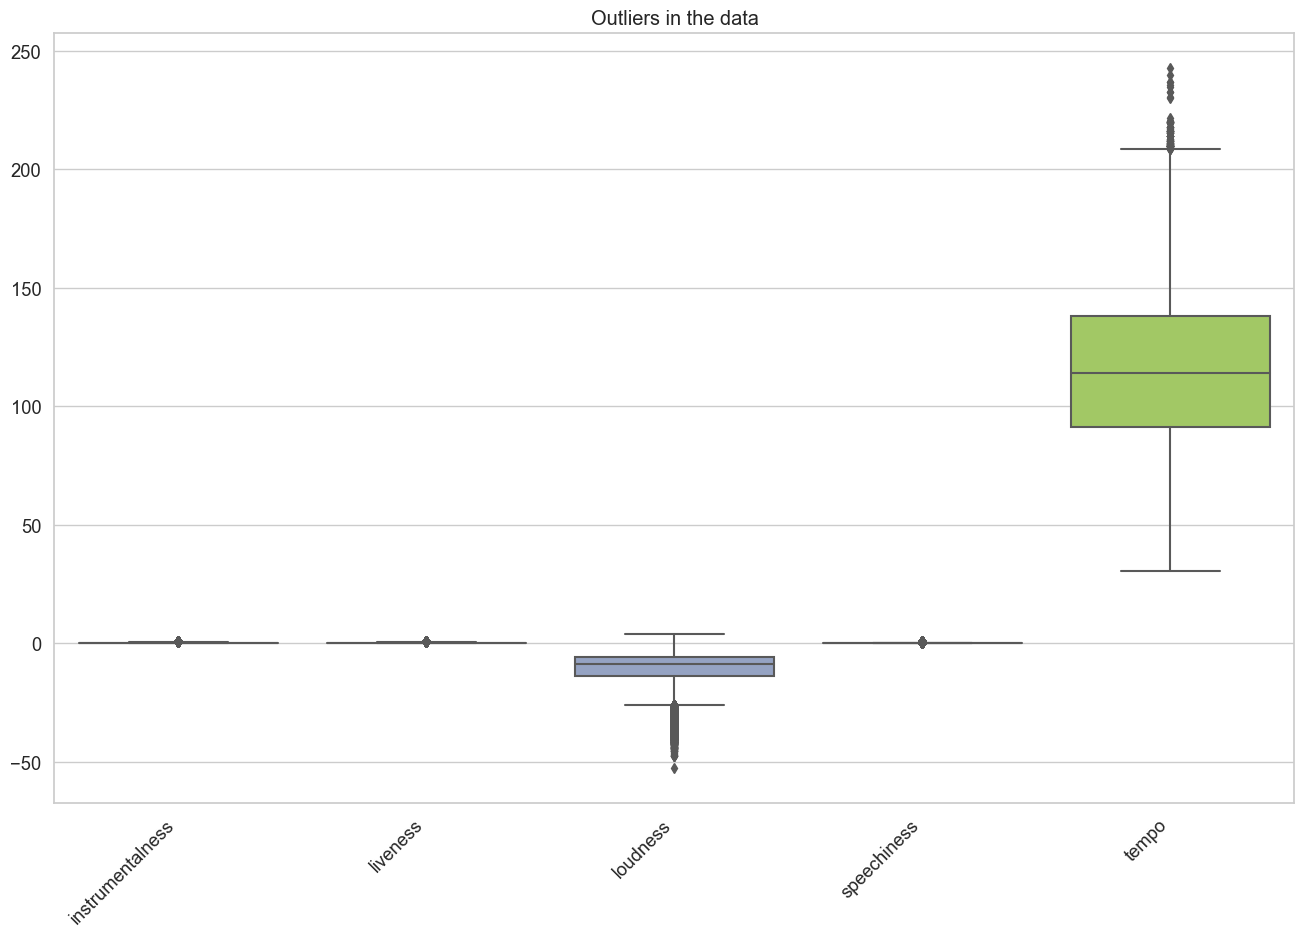

In [31]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid", font_scale=1.2)

columns_to_plot = ['instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

sns.boxplot(data=df[columns_to_plot], palette="Set2")
plt.title('Outliers in the data')
plt.xticks(rotation=45, ha="right")
plt.show()



In [32]:

def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else df[column].median())

for column in columns_to_plot:
    handle_outliers(column)

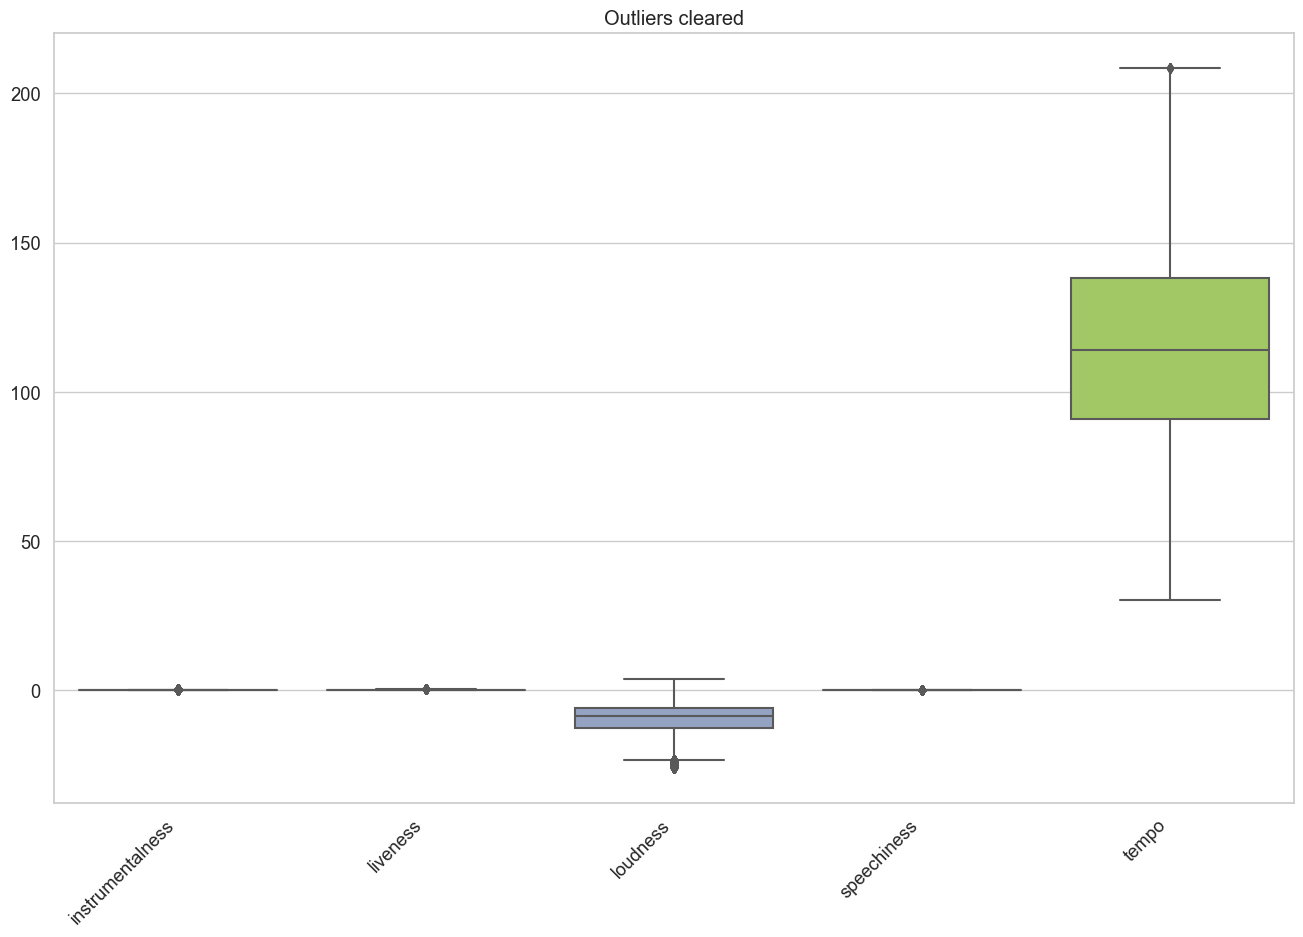

In [33]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid", font_scale=1.2)

sns.boxplot(data=df[columns_to_plot], palette="Set2")

plt.xticks(rotation=45, ha="right")
plt.title('Outliers cleared')
plt.show()

In [34]:
df.head()

,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Movie,0.611,0.389,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,Movie,0.246,0.590,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,Movie,0.952,0.663,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,Movie,0.703,0.240,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,Movie,0.950,0.331,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


In [35]:
df['genre'].unique()

array(['Movie', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'R&B', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [36]:
genre_mapping = {
    'Movie': 'Movie',
    'R&B': 'R&B',
    'A Capella': 'Vocal',
    'Alternative': 'Rock',
    'Country': 'Country',
    'Dance': 'Pop',
    'Electronic': 'Pop',
    'Anime': 'Anime',
    'Folk': 'Folk',
    'Blues': 'Jazz',
    'Opera': 'Classical',
    'Hip-Hop': 'Hip-Hop',
    "Children's Music": 'Children',
    'Children’s Music': 'Children',
    'Rap': 'Hip-Hop',
    'Indie': 'Indie',
    'Classical': 'Classical',
    'Pop': 'Pop',
    'Reggae': 'Reggae',
    'Reggaeton': 'Reggae',
    'Jazz': 'Jazz',
    'Rock': 'Rock',
    'Ska': 'Reggae',
    'Comedy': 'Comedy',
    'Soul': 'Soul',
    'Soundtrack': 'Soundtrack',
    'World': 'World',
}

In [37]:
df['broadgenre'] = df['genre'].map(genre_mapping)

In [38]:
df['broadgenre'].unique()

array(['Movie', 'Vocal', 'Rock', 'Country', 'Pop', 'Anime', 'Folk',
       'Jazz', 'R&B', 'Classical', 'Hip-Hop', 'Children', 'Indie',
       'Reggae', 'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [39]:
genre_counts = df['broadgenre'].value_counts()

for genre, count in genre_counts.items():
    print(f'{genre}: {count}')

Reggae: 24231
Classical: 15933
Jazz: 14440
Pop: 12253
Comedy: 9673
Anime: 8556
Soundtrack: 8446
World: 7961
Movie: 7480
Country: 6526
Children: 6006
Soul: 4418
Folk: 4342
Rock: 3682
Hip-Hop: 2885
R&B: 2725
Indie: 1974
Vocal: 119


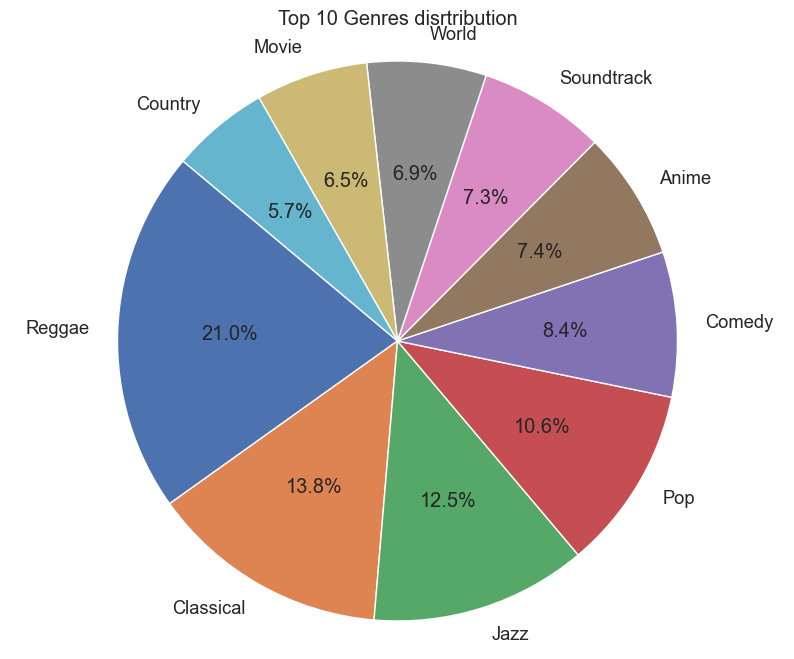

In [40]:
top_genres = df['broadgenre'].value_counts().head(10)

labels = top_genres.index
sizes = top_genres.values

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Genres disrtribution')
plt.axis('equal') 
plt.show()



In [41]:
genres_to_keep = ['Pop', 'Jazz', 'Classical', 'Reggae']
filtered_df = df[df['broadgenre'].isin(genres_to_keep)]

filtered_df.head()

,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,broadgenre
9108,Dance,0.35300,0.676,0.670,0.000000,0.1030,-6.584,0.0374,113.010,0.5400,Pop
13594,Dance,0.00116,0.790,0.853,0.000042,0.3290,-4.564,0.0665,124.998,0.7130,Pop
13601,Dance,0.07760,0.643,0.904,0.000000,0.1890,-3.694,0.0739,103.028,0.4810,Pop
13637,Dance,0.04900,0.726,0.698,0.000000,0.3090,-4.165,0.0431,143.994,0.8670,Pop
13738,Dance,0.31900,0.711,0.551,0.013300,0.0858,-6.107,0.0433,97.002,0.0637,Pop


In [42]:
filtered_df.shape

(66857, 11)

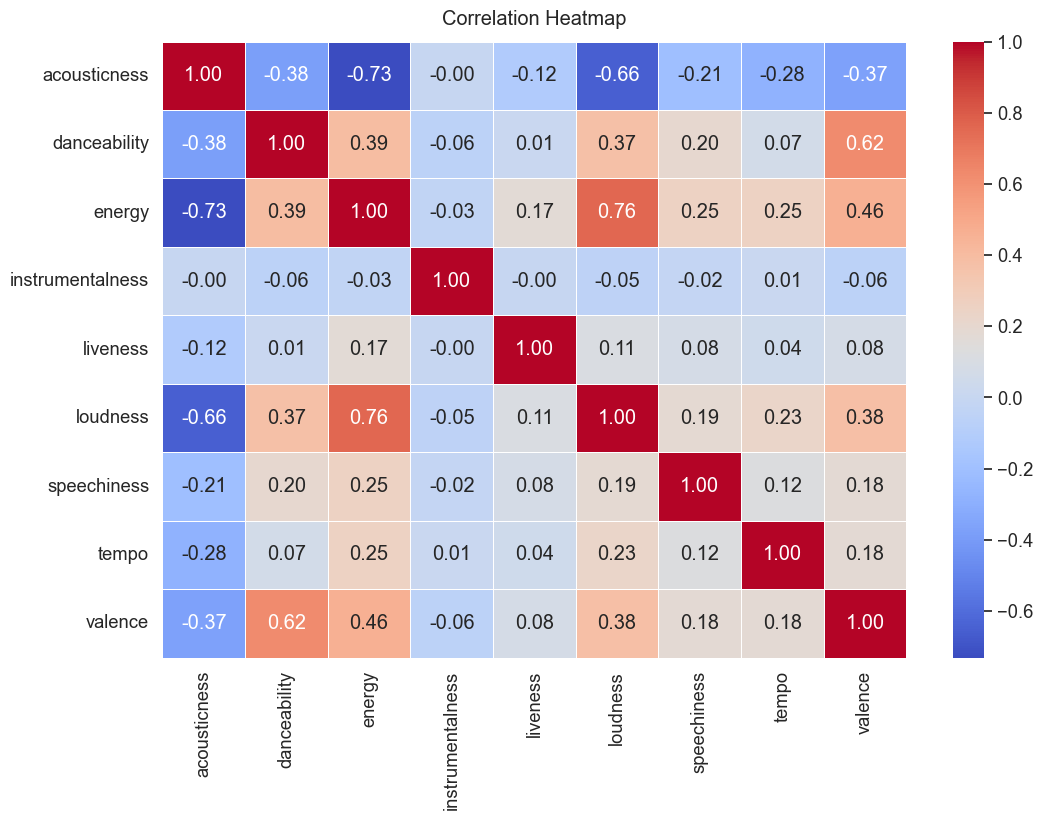

In [43]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
heatmap.set_title("Correlation Heatmap", pad=12)
plt.show()


In [44]:
df.to_csv('final_dataset.csv')